In [ ]:
workflow = {1:"Process and load Data",
            2: "build model",
            3: "fitting the model to data(Training)",
            4: "making predictions and evaluating a model",
            5: "saving and loading a model",
            6: "putting it all together"}
workflow

{1: 'Process and load Data',
 2: 'build model',
 3: 'fitting the model to data(Training)',
 4: 'making predictions and evaluating a model',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [ ]:
import torch
import matplotlib.pyplot as plt
from torch import nn # nn contains all of PyTorch's building blocks for neural networks

torch.__version__


'2.5.1+cu121'

## 1.Data Preprocessing
  Data can be anything...
  *  Excel data
  *  images
  *  videos
  *  audio
  *  natural language (text)
  *  DNA

Machine learning is a game of two parts
1.  Get data into numerical representation
2.  Build a model that finds the pattern in that numerical representatioin

In [ ]:
# Linear Regression
weight = 0.7
bias = 0.3

x = torch.arange(0,1, 0.02).unsqueeze(1)
y = x*weight + bias

x[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

### 1.Splitting data into training and test sets

  1. Training set - model learns from this data
  2. Validation set - model tune on this data
  3. Test set - model perform on never seen *data*


In [ ]:
train_split = int(0.8 * len(x))
X_train, y_train = x[: train_split], y[:train_split]
X_test, y_test = x[train_split:], y[train_split:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

In [ ]:
# Visualize

def plot_prediction(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     prediction=None):
  plt.figure(figsize=(5,3))

  plt.scatter(train_data, train_labels, c='b', label="Training data", marker="*")
  plt.scatter(test_data, test_labels, c='g', label="Testing data")

  if prediction is not None:
    plt.scatter(test_data, prediction, c='r', label='predicitions')

  plt.legend(prop={"size":14})


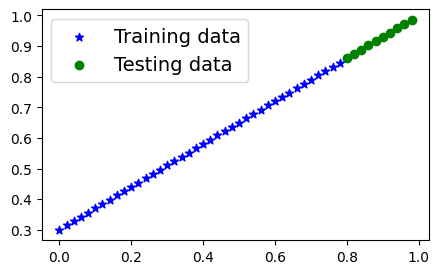

In [ ]:
plot_prediction()

## 2.Build model

`nn.module` - contains building for neural **networks**

Our first PyTorch model!
`Intitlize random parameters` -> `look at data and adjust parameters` -> `adjust parameters until they represent the actual data`

2 Algorithms:
1. Gradient Descent
2. Backpropagation

In [62]:
 #Create linear Regression model class
import torch
from torch import nn
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    #Initializw model parameters
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True, # default it is true
                                            dtype=torch.float32))
    self.bais = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype = torch.float))
  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bais

### PyTorch model building essentials

*  `torch.nn` - contians all the buildings for computaional graphs (a neural network can be conisdered a computational graph)
*  `torch.nn.parameters` - parameters that our model should try and learn, often a PyTorch layer from torch.nn will set these for us
*  `torch.nn.Module` - The base class for neural network modules, if you subclass it, you should overwrite forward()
*  `torch.optim` - where the optimizers in PyTorch live, they will help with gradient descent
* `def forward()` - All nn.module require you to overwrite this defines what happens in forward computaion   

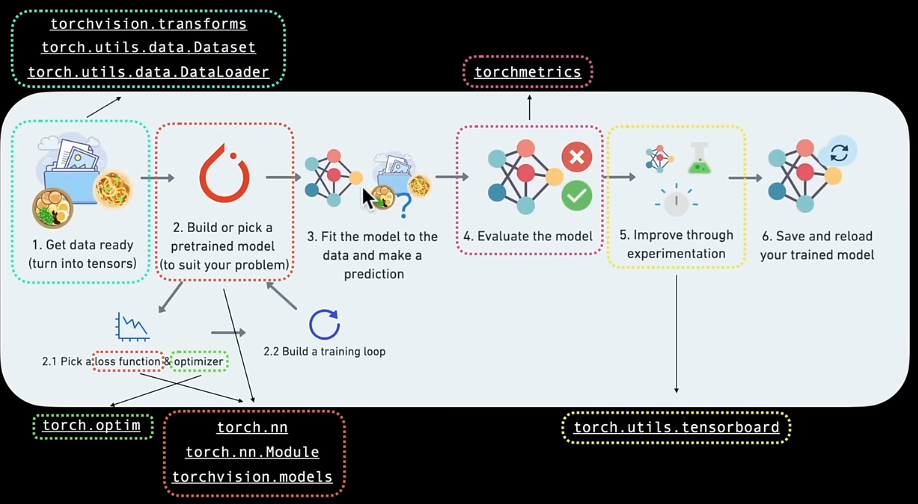

### Checking the contents of our PyTorch model

we can check our model parameters or whats's inside our model using `.parameters()`.

In [63]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()

print(list(model_0.parameters()))

[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]


In [ ]:
#List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bais', tensor([0.1288]))])

In [ ]:
y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [ ]:
# Making predictioins using torch.inference_mode()
# Inference mode turn off all features that are used while training (turn off gradients)
# So the model doesn't have all information to perform during inference or prediction
with torch.inference_mode():
  y_preds = model_0(X_test)

# You can also do something similar using torch.no_grad()
# with torch.no_grad():
#   y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [ ]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

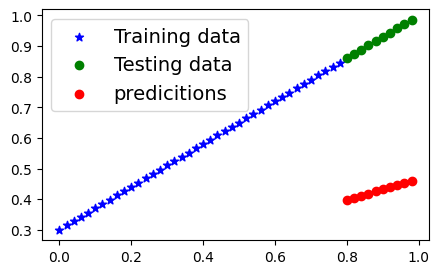

In [ ]:
plot_prediction(prediction=y_preds)

## 3.*Training* Model

The whole idea of training is for a model to move from some **unknown** parameters to **known** parameters

Move from **poor** representation of data to **true** representation data

To measure how poor our is performing we use **loss** funciton
*  **Loss Funciton:** A function to measure how wrong your model's predictions are to the ideal outputs, lower is better
*  **Optimizer:** Takes into account the loss of the model's parameters(e.g. weight & bais in our case) to improve the loss

And specifically for PyTorch we need:
*  Training Loop
*  Testing Loop

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bais', tensor([0.1288]))])

In [ ]:
# Setup a loss funcion
loss_fn = nn.L1Loss()

# Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) #lr = learning rate (Hyper parameter)

### Building a training loop (and a testing loop) in PyTorch

A couple of things we need in training loop:
0. Loop through the data
1. Forward pass (this involves data moving through our model's `forward()` funcions) to make predictions on data - also called forward propagation
2. Calculate the loss (compare forward pass prediction to ground truth value)]
3. Optimizer zero grad
4. Loss backward
5. Optimizer step - use the

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [64]:
torch.manual_seed(42)# An epochs is one loop through the data... (hyperparameter)
epochs = 100

epoch_count = []
loss_values = []
test_loss_values = []
## Training Loop
for epoch in range(epochs):
  # Set the model to tain mode
  model_0.train() # train mode in PyTorch sets all parameters that require gradients to True

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate Loss
  loss = loss_fn(y_pred, y_train)

  #3. Optimizer zero grad
  optimizer.zero_grad()

  #4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  #5. Step of the optimizer(perform gradient descent)
  optimizer.step()

  # print(model_0.state_dict())

  # model_0.eval() # Turn off different things in model that doesn't need during testing(dropout/batch norm)
  with torch.inference_mode(): # turns off gradient tracking
  # with torch.no_grad():
    # 1. Do the forward pass
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)


  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")


    print(model_0.state_dict())





Epoch: 0 | Loss: 0.31288138031959534 | Test Loss: 0.4945361614227295
OrderedDict([('weights', tensor([0.3367])), ('bais', tensor([0.1288]))])
Epoch: 10 | Loss: 0.31288138031959534 | Test Loss: 0.4945361614227295
OrderedDict([('weights', tensor([0.3367])), ('bais', tensor([0.1288]))])
Epoch: 20 | Loss: 0.31288138031959534 | Test Loss: 0.4945361614227295
OrderedDict([('weights', tensor([0.3367])), ('bais', tensor([0.1288]))])
Epoch: 30 | Loss: 0.31288138031959534 | Test Loss: 0.4945361614227295
OrderedDict([('weights', tensor([0.3367])), ('bais', tensor([0.1288]))])
Epoch: 40 | Loss: 0.31288138031959534 | Test Loss: 0.4945361614227295
OrderedDict([('weights', tensor([0.3367])), ('bais', tensor([0.1288]))])
Epoch: 50 | Loss: 0.31288138031959534 | Test Loss: 0.4945361614227295
OrderedDict([('weights', tensor([0.3367])), ('bais', tensor([0.1288]))])
Epoch: 60 | Loss: 0.31288138031959534 | Test Loss: 0.4945361614227295
OrderedDict([('weights', tensor([0.3367])), ('bais', tensor([0.1288]))])


In [ ]:
test_loss_values

[tensor(0.3129, grad_fn=<MeanBackward0>),
 tensor(0.1977, grad_fn=<MeanBackward0>),
 tensor(0.0891, grad_fn=<MeanBackward0>),
 tensor(0.0531, grad_fn=<MeanBackward0>),
 tensor(0.0454, grad_fn=<MeanBackward0>),
 tensor(0.0417, grad_fn=<MeanBackward0>),
 tensor(0.0382, grad_fn=<MeanBackward0>),
 tensor(0.0348, grad_fn=<MeanBackward0>),
 tensor(0.0313, grad_fn=<MeanBackward0>),
 tensor(0.0279, grad_fn=<MeanBackward0>)]

In [ ]:
import torch
import numpy as np
torch.tensor(loss_values).numpy()


array([0.31288138, 0.19767132, 0.08908726, 0.05314853, 0.04543797,
       0.04167863, 0.03818933, 0.0347609 , 0.03132383, 0.0278874 ],
      dtype=float32)

In [ ]:
torch.tensor(test_loss_values).numpy()

array([0.31288138, 0.19767132, 0.08908726, 0.05314853, 0.04543797,
       0.04167863, 0.03818933, 0.0347609 , 0.03132383, 0.0278874 ],
      dtype=float32)

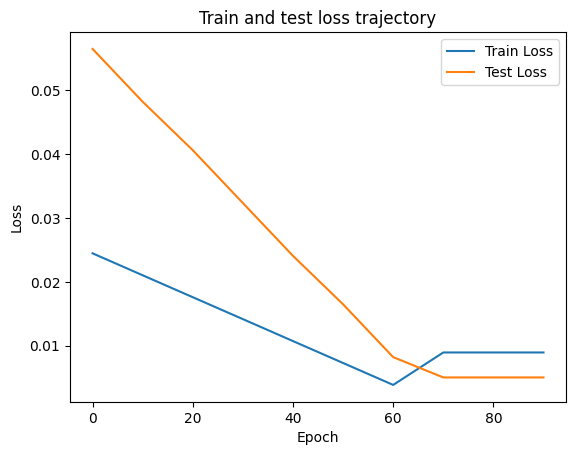

In [ ]:
plt.plot(epoch_count, torch.tensor(loss_values).numpy(), label="Train Loss")
plt.plot(epoch_count, torch.tensor(test_loss_values).numpy(), label="Test Loss")
plt.title("Train and test loss trajectory")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend();

In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

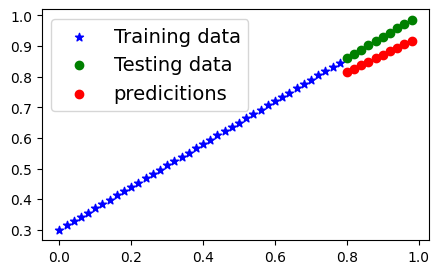

In [ ]:
plot_prediction(prediction=test_pred)

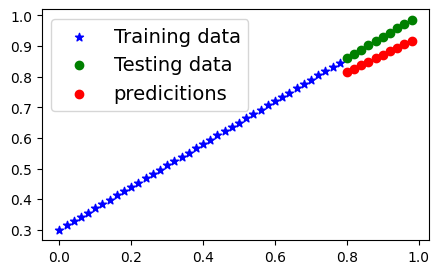

In [ ]:
plot_prediction(prediction=y_preds_new)

In [ ]:
 model_0.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bais', tensor([0.3513]))])

In [ ]:
weight, bias

(0.7, 0.3)

##Saving the model in PyTorch
 There are three main methods to save and load model in PyTorch

 1. `torch.save()` - Save a PyTorch object in pickle model
 2. `torch.load()` - load a saved PyTorch object
 3. `torch.nn.load_state_dict()`- this allows to load a model's saved state dictionart



In [ ]:
# Saving our PyTorch model
from pathlib import Path

#1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

In [ ]:

torch.save(obj=model_0.state_dict(),f=MODEL_SAVE_PATH)

In [ ]:
MODEL_SAVE_PATH

PosixPath('models/01_pytorch_workflow_model_0.pth')

Loading a PyTorch model

since we saved our model's `state_dict()` rather than entire model, we'll create a new instance of our model class and load `state_dict()` into that.

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bais', tensor([0.3093]))])

In [ ]:
loaded_model_0 = LinearRegressionModel()
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<ipython-input-43-0bf1fd8e0a7c>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bais', tensor([0.3093]))])

## 4. Practice

In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
x = torch.arange(0, 1, 0.02)
x

tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
        0.1800, 0.2000, 0.2200, 0.2400, 0.2600, 0.2800, 0.3000, 0.3200, 0.3400,
        0.3600, 0.3800, 0.4000, 0.4200, 0.4400, 0.4600, 0.4800, 0.5000, 0.5200,
        0.5400, 0.5600, 0.5800, 0.6000, 0.6200, 0.6400, 0.6600, 0.6800, 0.7000,
        0.7200, 0.7400, 0.7600, 0.7800, 0.8000, 0.8200, 0.8400, 0.8600, 0.8800,
        0.9000, 0.9200, 0.9400, 0.9600, 0.9800])

In [3]:
y = 0.7*x + 0.3
y

tensor([0.3000, 0.3140, 0.3280, 0.3420, 0.3560, 0.3700, 0.3840, 0.3980, 0.4120,
        0.4260, 0.4400, 0.4540, 0.4680, 0.4820, 0.4960, 0.5100, 0.5240, 0.5380,
        0.5520, 0.5660, 0.5800, 0.5940, 0.6080, 0.6220, 0.6360, 0.6500, 0.6640,
        0.6780, 0.6920, 0.7060, 0.7200, 0.7340, 0.7480, 0.7620, 0.7760, 0.7900,
        0.8040, 0.8180, 0.8320, 0.8460, 0.8600, 0.8740, 0.8880, 0.9020, 0.9160,
        0.9300, 0.9440, 0.9580, 0.9720, 0.9860])

In [9]:
test_split = int(0.8 * len(x))
X_train = x[:test_split]
X_test = x[test_split:]
y_train = y[:test_split]
y_test = y[test_split:]
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

In [8]:
len(x) * 0.8

40.0

In [19]:
def plot_predictions(X_train = X_train,
                     X_test = X_test,
                     y_train = y_train,
                     y_test = y_test,
                     predictions = None):
  plt.figure(figsize=(5,3))
  plt.scatter(X_train, y_train, c='r', label='training data', marker='.')
  plt.scatter(X_test, y_test, c='g', label='testing data', marker='.')

  if predictions != None:
    plt.scatter(X_test, predictions, color='b', marker='*')

  plt.legend(prop={'size':10})



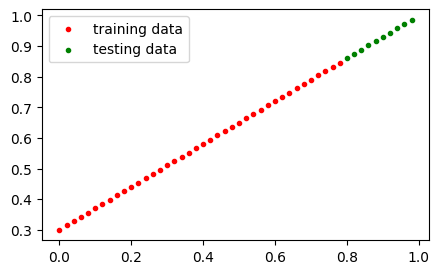

In [20]:
plot_predictions()

### Linear Regression class

In [34]:
from torch import nn
class LinearRegressionClass(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                           requires_grad = True,
                                           dtype = torch.float32))
    self.bais = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype = torch.float32))
  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.weights*x + self.bais


In [80]:
torch.manual_seed(42)
model = LinearRegressionClass()

model.state_dict()


OrderedDict([('weights', tensor([0.3367])), ('bais', tensor([0.1288]))])

In [59]:
list(model.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [36]:
model(X_test)

tensor([0.3982, 0.4049, 0.4116, 0.4184, 0.4251, 0.4318, 0.4386, 0.4453, 0.4520,
        0.4588], grad_fn=<AddBackward0>)

In [37]:
with torch.inference_mode():
  y_pred = model(X_test)

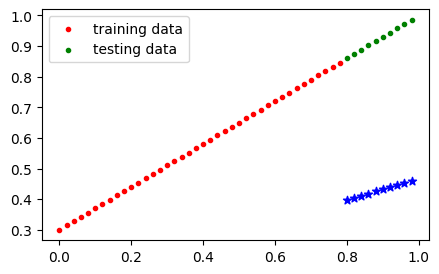

In [38]:
plot_predictions(predictions=y_pred)

In [82]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(lr=0.01,
                            params=model.parameters())

In [83]:
torch.manual_seed(42)
epochs = 200
loss_value = []
test_loss_value = []
epoch_value = []

for epoch in range(epochs):

  model.train()

  y_pred = model(X_train)

  loss = loss_fn(y_pred, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  with torch.inference_mode():
    test_pred = model(X_test)
    test_loss = loss_fn(test_pred, y_test)

  if epoch%10 == 0:
    loss_value.append(loss)
    test_loss_value.append(test_loss)
    epoch_value.append(epoch)

    print(f"Train Loss: {loss} | Test Loss: {test_loss} | epoch : {epoch}")

model.state_dict()

Train Loss: 0.31288138031959534 | Test Loss: 0.48106518387794495 | epoch : 0
Train Loss: 0.1976713240146637 | Test Loss: 0.3463551998138428 | epoch : 10
Train Loss: 0.08908725529909134 | Test Loss: 0.21729660034179688 | epoch : 20
Train Loss: 0.053148526698350906 | Test Loss: 0.14464017748832703 | epoch : 30
Train Loss: 0.04543796554207802 | Test Loss: 0.11360953003168106 | epoch : 40
Train Loss: 0.04167863354086876 | Test Loss: 0.09919948130846024 | epoch : 50
Train Loss: 0.03818932920694351 | Test Loss: 0.08886633068323135 | epoch : 60
Train Loss: 0.03476089984178543 | Test Loss: 0.0805937647819519 | epoch : 70
Train Loss: 0.03132382780313492 | Test Loss: 0.07232122868299484 | epoch : 80
Train Loss: 0.02788739837706089 | Test Loss: 0.06473556160926819 | epoch : 90
Train Loss: 0.024458957836031914 | Test Loss: 0.05646304413676262 | epoch : 100
Train Loss: 0.021020207554101944 | Test Loss: 0.04819049686193466 | epoch : 110
Train Loss: 0.01758546568453312 | Test Loss: 0.0406048223376274

OrderedDict([('weights', tensor([0.6990])), ('bais', tensor([0.3093]))])

In [86]:
# epoch_value
# torch.tensor(loss_value).numpy()
test_loss_value

[tensor(0.4811),
 tensor(0.3464),
 tensor(0.2173),
 tensor(0.1446),
 tensor(0.1136),
 tensor(0.0992),
 tensor(0.0889),
 tensor(0.0806),
 tensor(0.0723),
 tensor(0.0647),
 tensor(0.0565),
 tensor(0.0482),
 tensor(0.0406),
 tensor(0.0323),
 tensor(0.0241),
 tensor(0.0165),
 tensor(0.0082),
 tensor(0.0050),
 tensor(0.0050),
 tensor(0.0050)]

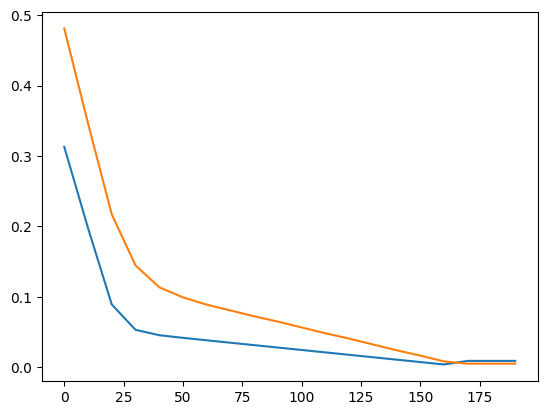

In [89]:
plt.plot(epoch_value, torch.tensor(loss_value).numpy(), label="Train Loss")
plt.plot(epoch_value, torch.tensor(test_loss_value).numpy(), label="Train Loss")

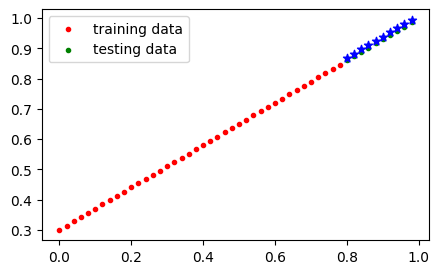

In [90]:
with torch.inference_mode():
  y_pred = model(X_test)

plot_predictions(predictions=y_pred)

In [92]:
class LinearRegressionClassV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=1,
                                    out_features=1)

    def forward(self, x:torch.Tensor) -> torch.Tensor:
      return self.linear_layer(x)


torch.manual_seed(43)
model_V2 = LinearRegressionClassV2()
model_V2.state_dict()



OrderedDict([('linear_layer.weight', tensor([[-0.0921]])),
             ('linear_layer.bias', tensor([-0.6070]))])

In [94]:
next(model_V2.parameters()).device

device(type='cpu')

In [95]:
model.to(device)

NameError: name 'device' is not defined